- 주제 : “어버이날” 관련 기사를 통한 연도별 트랜드 분석

- 데이터 : 네이버 연도별(2000-2016) 5월 8일 뉴스에서 "어버이날" 로 검색

- 가설 : 시대가 변함에 따라 핵가족, 개인주의 성향이 강해 졌을 것이다.

- 예상되는 결과 : 긍정적 단어(효도, 관광…) ->부정적 단어 (재산, 사고, 용돈 등)

In [1]:
import requests
import lxml.html
import csv
import codecs
import seaborn
import numpy
import operator
import pandas
import seaborn

from konlpy.tag import Twitter, Kkma, Komoran, Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from matplotlib import pyplot

In [2]:
#http://news.naver.com/main/search/search.nhn?query=%BE%EE%B9%F6%C0%CC%B3%AF&startDate=2000-05-08&endDate=2000-05-08&page=1

In [ ]:
base_url ='http://news.naver.com/main/search/search.nhn?query=%BE%EE%B9%F6%C0%CC%B3%AF&startDate={date}&endDate={date}'
pg ='&page={}'

#tit_url = './/a[@class = "go_naver"]'
#text_url = './/div[@id ="articleBodyContents"]'


for i in range (2000, 2017):  
    file_name = 'news_'+str(i)+'.csv'
    print (file_name)
    
    with open( file_name, 'w', encoding='utf8') as f:
        writer = csv.writer(f)

        year_date = str(i)+'-05-08'
        year_url = base_url.format(date=year_date) + pg
        print (year_date , year_url)

        for page in range(1,30):

            res =requests.get (year_url.format(page))
            root_list = lxml.html.fromstring(res.text)

            for node in root_list.xpath('.//a[@class = "go_naver"]'):
                try:
                    res = requests.get (node.attrib['href'])
                    sub_list = lxml.html.fromstring(res.text)
#                    print (node.text_content(), node.attrib['href'])
                    sub_text =sub_list.xpath( './/div[@id ="articleBodyContents"]')[0] 
#                    print (sub_text.text_content())
                    writer.writerow([sub_text.text_content()])            
                except:
                    continue


In [3]:
exclude = ['경우','계속','고령','기자','내용','노무현','노인','뉴스','뉴시스','당사','대통령','대한','때문','라며','레터','만원','매일','면서','무단','문제','물론','민주당',
               '바로','배포','부모','부모님','부산','서울','실제','어르신','어버이','어버이날','엄마','업체','연합뉴스','예정','오늘','우편','월드', '위해','의원','이번','이상',
               '이회창','인천','일보','전재','정도','지난','지방','청와대','최규선','최근','최대','통해','하나','하루','하자', '한나라당','홍걸','회장가장','효도경남','후보',
               '후보가장','후보가정','후보경남','행사','가운데','다른','다음','만날','저작권','어머니','아버지']

def get_word (doc) :    #1음절, 특정단어 삭제
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun)>1 and noun not in exclude ]

news_2000.csv


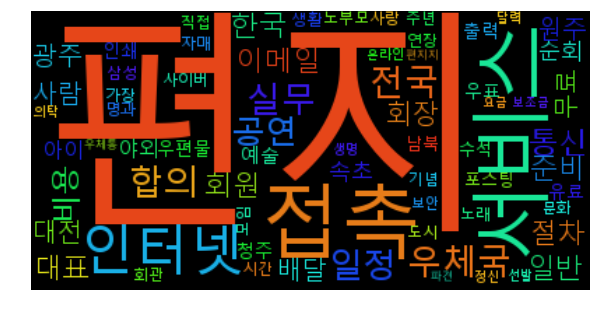

news_2001.csv


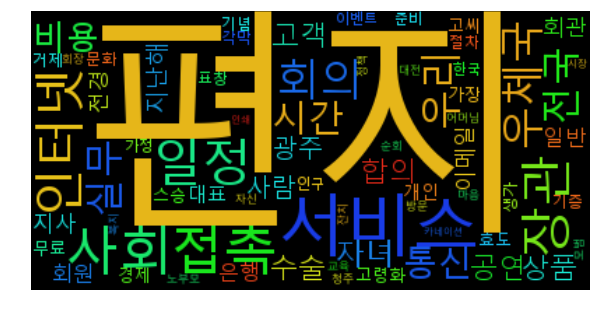

news_2002.csv


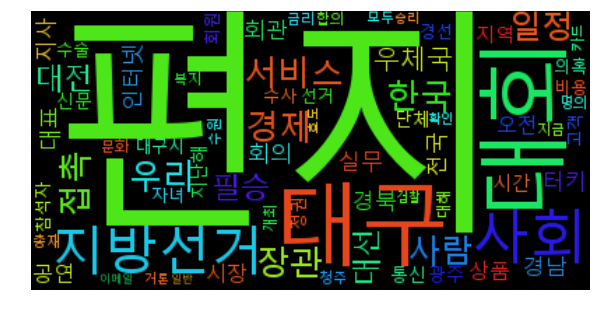

news_2003.csv


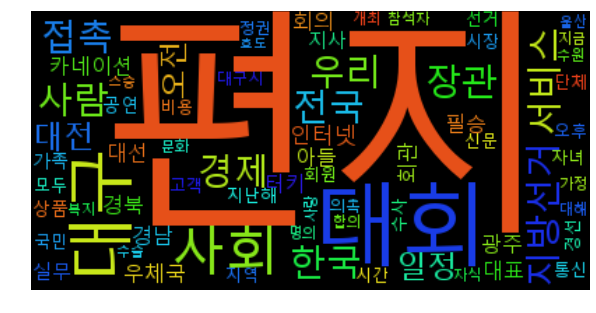

news_2004.csv


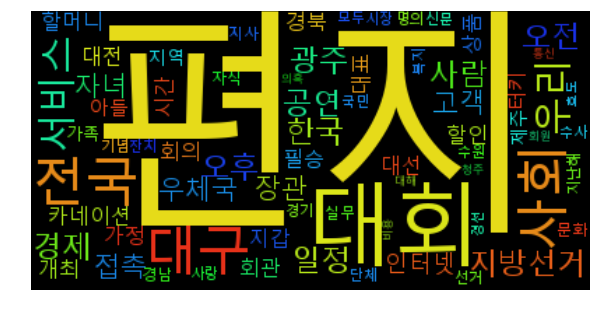

news_2005.csv


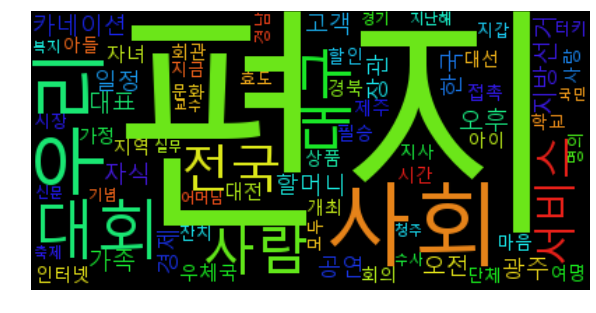

news_2006.csv


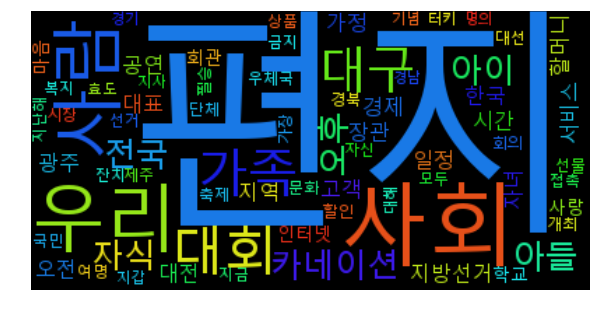

news_2007.csv


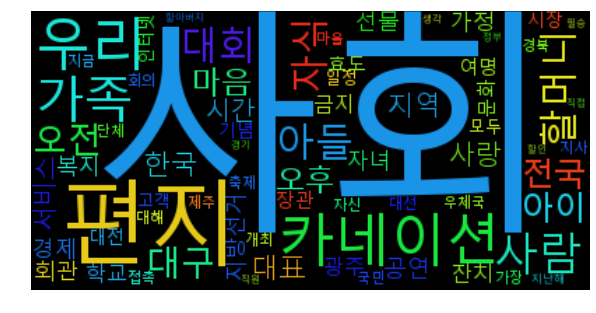

news_2008.csv


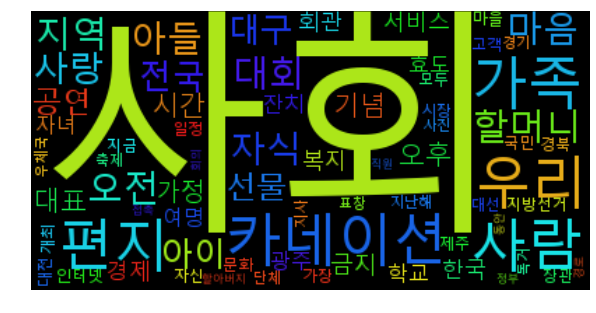

news_2009.csv


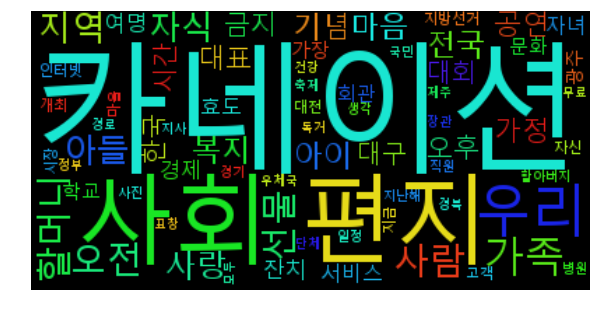

news_2010.csv


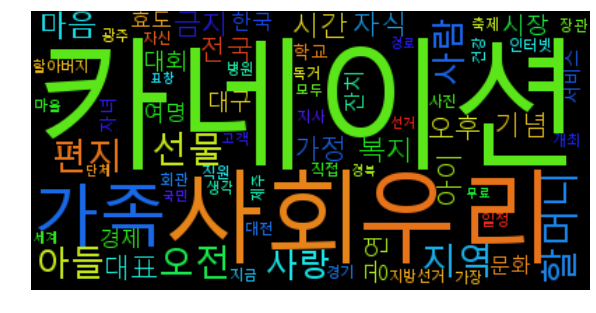

news_2011.csv


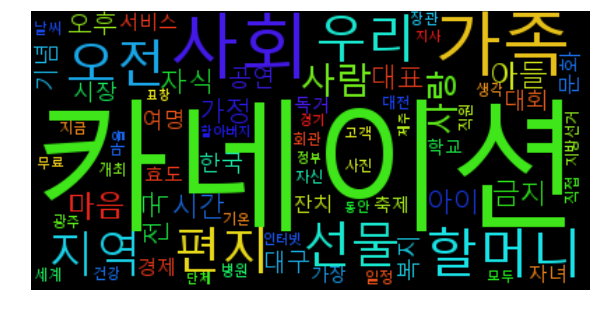

news_2012.csv


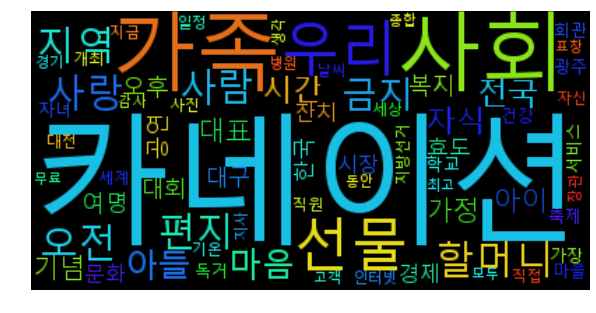

news_2013.csv


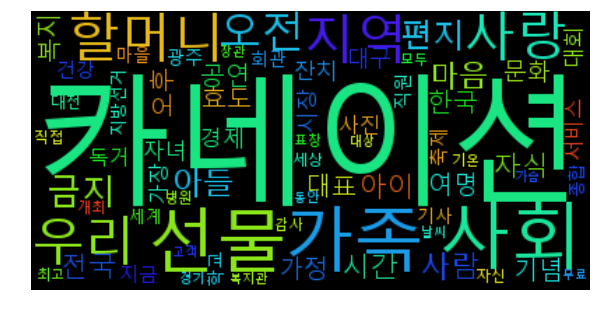

news_2014.csv


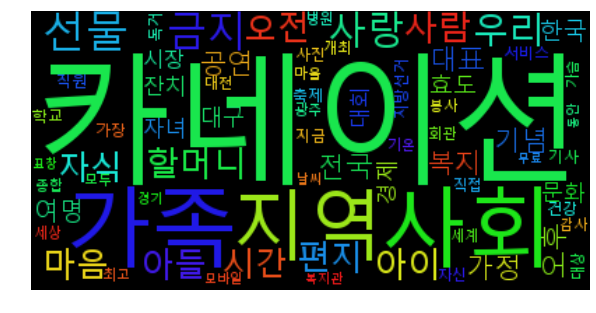

news_2015.csv


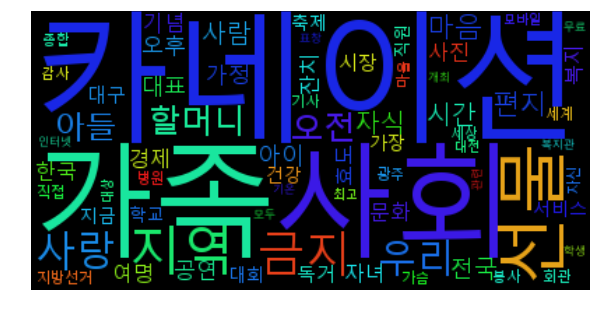

news_2016.csv


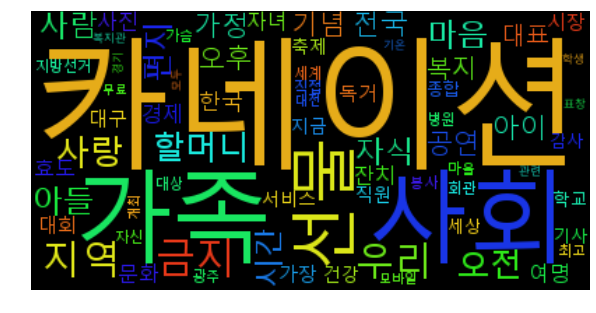

In [4]:
news = []
   

%matplotlib inline
    
for year in range (2000, 2017):
    file_name ='news_'+str(year)+'.csv'
    print (file_name)
    
    with open(file_name, encoding='utf8', newline='\r\n') as f:
        reader = csv.reader(f)
        for row in reader:
            news.append(row[0])

        tagger = Twitter()
        cv = CountVectorizer(tokenizer=get_word, max_features=70)
        tdf = cv.fit_transform(news)
        words = cv.get_feature_names()
        count_mat = tdf.sum(axis=0)
        count = numpy.squeeze(numpy.asarray(count_mat))
        word_count = list(zip(words, count))
       
        wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='black', width=400, height=200)
        cloud = wc.generate_from_frequencies(word_count)
    
        pyplot.figure(figsize=(10, 8))
        pyplot.imshow(cloud)
        pyplot.axis("off")
        pyplot.show()
   
#    print (year, word_count)
    
#    with open('tot_tdm1.csv', 'a', encoding='utf8') as f:
#        f.write('\n'.join(words))


In [5]:
data = pandas.DataFrame({'year': [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
                                             2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
                                             2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
                                             2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016],                                       
                         'word': ['할머니','할머니','할머니','할머니','할머니','할머니','할머니','할머니','할머니','할머니','할머니','할머니','할머니','할머니','할머니','할머니','할머니',
                                  '할아버지','할아버지','할아버지','할아버지','할아버지','할아버지','할아버지','할아버지','할아버지','할아버지','할아버지','할아버지','할아버지','할아버지',
                                  '할아버지','할아버지','할아버지','어머니','어머니','어머니','어머니','어머니','어머니','어머니','어머니','어머니','어머니','어머니','어머니','어머니','어머니',
                                  '어머니','어머니','어머니','아버지','아버지','아버지','아버지','아버지','아버지','아버지','아버지','아버지','아버지','아버지','아버지','아버지','아버지',
                                  '아버지','아버지','아버지'],
                        'count': [0,0,0,0,255,340,421,671,729,879,1027,1098,1128,1190,1197,1206,1251, 0,0,0,0,0,0,0,270,303,345,399,411,0,0,0,0,0,0,195,211,328,342,506,691,
                                  921,1031,1175,1390,1532,1560,1620,1652,1716,1762,0,101,0,145,181,267,477,609,804,943,1042,1084,1143,1169,1216,1233,1248]})
## 형태소 단어와 숫자를 한번에 저장하는 방법.... 

In [6]:
data

,count,word,year
0,0,할머니,2000
1,0,할머니,2001
2,0,할머니,2002
3,0,할머니,2003
4,255,할머니,2004
5,340,할머니,2005
6,421,할머니,2006
7,671,할머니,2007
8,729,할머니,2008
9,879,할머니,2009


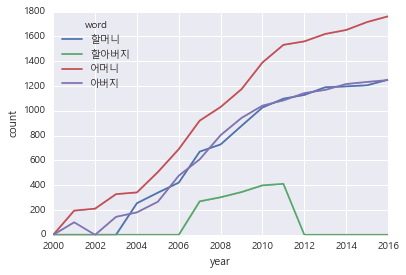

In [7]:
%matplotlib inline
seaborn.set_style('darkgrid', {'font.family': 'Malgun Gothic'})
seaborn.tsplot(data=data, value="count", time='year', condition='word', unit='word')


# 결론
  - "어버이날"에 대한 근본적 세계관의 변화는 없는 것으로 판단됨
  - "편지" 등과 같은 아날로그적인 감성적 단어가 감소함
  - 성별단어 분석결과 예상대로 어머니와 할머니의 비중이 훨씬 높은 것으로 나타남
    (사회적 현상을 반영한 것으로 판단)
  - "카네이션" 등과 같은 단어는 긍정적 요인 인지 부정적 요인 인지는 파악하기 어려움 
    (형태소와의 연결관계 파악 필요)

# 기타:
 - 포털의 5/8 뉴스의 키워드만을 사용하여 사회현상을 분석하기에는 어려움
 - 주제에 따른 크롤링 대상 선정과 형태소 분석을 포함한 감정분석 등도 필요할 것으로 판단됨